<a href="https://colab.research.google.com/github/yandod/machine-learning-examples/blob/main/07_openai_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai japanize_matplotlib
import os
import openai

# Load your API key from an environment variable or secret management service
openai.api_key = None #@param


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b88c090ea95e356b0f9a0b2071f62e83a7508d2ec6273b5675eb477873a60252
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
#@title [2-1] 指定した単語の埋め込み表現を取得
model = 'text-embedding-ada-002'
word = 'トマト' #@param
openai.Embedding.create(input = [word], model=model)['data'][0]['embedding']

[-0.004107093438506126,
 -0.02313855290412903,
 -0.005468184594064951,
 -0.026241840794682503,
 -0.02101525105535984,
 0.03421783819794655,
 -0.019028058275580406,
 0.004338478669524193,
 -0.0039437622763216496,
 -0.022389953956007957,
 0.008955981582403183,
 0.013080088421702385,
 -0.019422773271799088,
 0.0005682556657120585,
 -0.010956785641610622,
 0.009643332101404667,
 0.030080119147896767,
 -0.00184257747605443,
 0.016836700960993767,
 -0.03710335120558739,
 0.023152165114879608,
 -0.019776657223701477,
 0.013549664989113808,
 -0.007104896940290928,
 -0.01234509889036417,
 -0.014822284691035748,
 0.022648559883236885,
 -0.028855137526988983,
 -0.0008128267363645136,
 0.0009808364557102323,
 0.026241840794682503,
 -0.019953599199652672,
 -0.011514833196997643,
 -0.017925573512911797,
 -0.022771058604121208,
 -0.01772140897810459,
 -0.008363906294107437,
 -0.008173353970050812,
 0.019613327458500862,
 -0.0005571967922151089,
 -0.004740000702440739,
 -0.00023329956457018852,
 0.015

In [ ]:
#@title [3-1] 単語に対応する埋め込み表現をモデルから取得
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from gensim.models import Word2Vec, KeyedVectors

#任意の単語リスト
words = [
    'パン',
    'おにぎり',
    '寿司',
    'ステーキ',
    '焼きそば',
    'ピザ',
    'スパゲッティ',
    'アメリカ',
    '日本',
    'イタリア',
    '猫',
    'クジラ',
    '大陸',
    '富士山',
    '日本刀',
    '手裏剣',
    'ピストル'
]

#予備の単語リスト
words = ['日本','東京','イタリア','ローマ','ロシア','モスクワ','アメリカ','ニューヨーク','中国','北京','韓国','ソウル']


words = [
  'みんなのコード、「第5回情報教育の未来を考える”若手”勉強会」を開催',
  '東京大学で開催される「生成AI時代の情報教育」シンポジウムに、みんなのコード宮島が登壇いたします。',
  'みんなのコードと日本女子大学附属中学校がテクノロジー分野で社会に貢献する力を培うカリキュラムを開発',
  'みんなのコード、公共交通手段のないエリアの子どもたちに向けて「MINIで無料送迎サービス」を提供',
  'みんなのコード、千葉県における情報教育の充実と発展を推進に関する連携協定締結',
]


vectors = []
for word in words:
  embeding = openai.Embedding.create(input = [word], model=model)['data'][0]['embedding']
  vectors.append(embeding)

vectors[:2]

[[-0.02963440865278244,
  8.733211871003732e-06,
  0.0034317774698138237,
  -0.030845623463392258,
  0.0017781318165361881,
  0.018397018313407898,
  -0.016822438687086105,
  -0.01061832346022129,
  -0.007664303295314312,
  -0.018222065642476082,
  -0.0037917776498943567,
  0.01851814053952694,
  -0.004407478962093592,
  -0.021411599591374397,
  -0.027481136843562126,
  0.0003484347544144839,
  0.013027296401560307,
  -0.02363216131925583,
  0.016660943627357483,
  -0.02011963725090027,
  0.014669166877865791,
  0.013444493524730206,
  0.00392299285158515,
  -0.003391403704881668,
  -0.01544972788542509,
  -0.010800005868077278,
  0.008014209568500519,
  -0.025798892602324486,
  -0.0014475708594545722,
  -0.006951031740754843,
  0.032325997948646545,
  -0.0026428052224218845,
  0.01687627099454403,
  -0.021223189309239388,
  -0.013848232105374336,
  -0.020375337451696396,
  -0.01970244012773037,
  0.0009378509712405503,
  0.02030804753303528,
  -0.004575703293085098,
  0.02189608663320

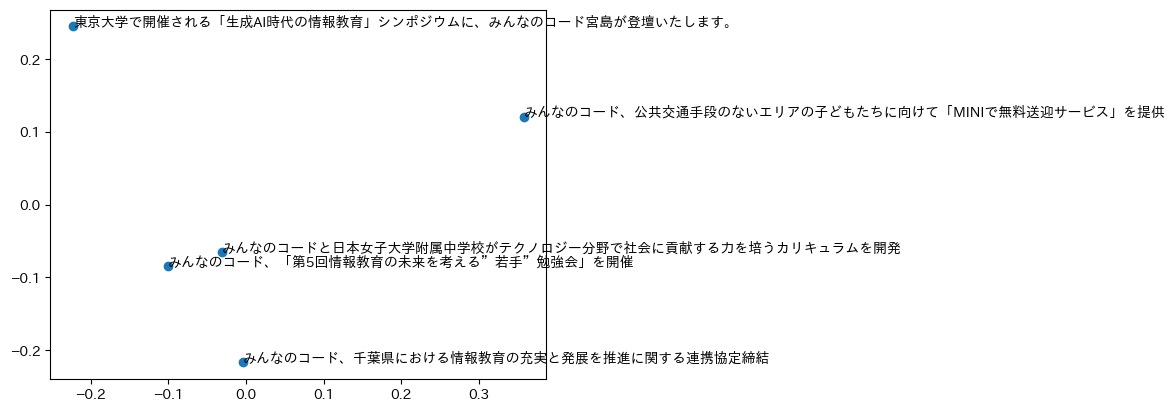

In [ ]:
#@title [3-5] PCAで次元削減してプロット
from sklearn.decomposition import PCA

# PCAの適用
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# プロット
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


In [ ]:
#@title [3-7] マウス操作に対応したPlotlyでプロットする
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px

# PCAで3つの主成分を抽出
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(vectors)

# DataFrameに変換
import pandas as pd
df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])

# 3Dプロット
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', text=words)
fig.show()
